In [151]:
import pandas as pd
import pickle 

In [152]:
# Load the CSV file into a DataFrame
predictive_df = pd.read_csv('../data\predictive_df.csv')
filtered_df = pd.read_csv('../data\\filtered_df.csv')
target_column = filtered_df['ICU']

# Loading the correlations dictionary from the file
with open('../data//correlations.pkl', 'rb') as file:
    correlations = pickle.load(file)

In [153]:
target_column.head(5)

0    0
1    0
2    0
3    0
4    0
Name: ICU, dtype: int64

In [154]:
import numpy as np
import pandas as pd

# Create an empty DataFrame to store columns with nominal values
predictive_cat_df = pd.DataFrame()

# Iterate over the columns in the filtered dataframe
for column in predictive_df.columns:
    col_data = predictive_df[column]
    
    if set(col_data.dropna().unique()) == {0, 1}:
        predictive_cat_df[column] = col_data  # Add the column to the new DataFrame

In [155]:
predictive_cat_df.head(5)

,Sesso,Nazionalità,Domicilio,Profilassi,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,...,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0


In [156]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

In [157]:
# Step 1: Compute Covariance Matrix
XCov = predictive_cat_df.cov()

In [158]:
# Step 2: Perform Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=3)  # Set the desired latent dimension to 3
svd.fit(XCov)
V = svd.components_  # Latent vectors
sigma_squared = svd.singular_values_**2  # Squared singular values

In [159]:
XCov.head(10)

,Sesso,Nazionalità,Domicilio,Profilassi,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,...,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina
Sesso,0.229851,-0.010759,0.000587,0.009781,0.016236,-0.006847,-0.022692,5.477308e-03,-0.003717,-3.169014e-02,...,0.014671,0.017997,0.032668,2.112676e-02,0.001174,0.026800,-0.017801,0.023083,-0.012911,0.004890
Nazionalità,-0.010759,0.248631,0.018192,-0.016041,0.043232,0.022496,0.024257,1.017214e-02,-0.011933,3.169014e-02,...,0.004108,-0.000782,0.003326,-2.112676e-02,-0.005869,0.018584,0.016236,0.020736,0.008216,0.006064
Domicilio,0.000587,0.018192,0.040493,-0.001174,0.007629,-0.007629,-0.002347,-2.347418e-03,-0.002934,-3.521127e-03,...,-0.001761,-0.025822,-0.027582,-2.112676e-02,-0.003521,0.004108,-0.002934,-0.012911,-0.003521,-0.000587
Profilassi,0.009781,-0.016041,-0.001174,0.027387,-0.013693,-0.005086,-0.001565,-1.564945e-03,-0.001956,-7.042254e-03,...,-0.001174,-0.003130,-0.004304,-6.841163e-19,-0.002347,0.007433,-0.001956,0.005477,-0.002347,-0.000391
Comorbilità,0.016236,0.043232,0.007629,-0.013693,0.253326,0.094092,0.028951,2.895149e-02,-0.006064,1.056338e-02,...,-0.020540,0.036776,0.016236,7.042254e-03,0.001174,0.052621,0.008020,0.018388,0.043427,0.007238
Diabete,-0.006847,0.022496,-0.007629,-0.005086,0.094092,0.150039,-0.010172,1.799687e-02,0.001369,1.760563e-02,...,-0.007629,0.014867,0.007238,2.112676e-02,-0.001174,-0.000978,-0.012715,0.014476,0.012911,0.011541
HIV,-0.022692,0.024257,-0.002347,-0.001565,0.028951,-0.010172,0.053208,1.095462e-02,-0.003912,1.408451e-02,...,-0.002347,-0.006260,-0.008607,-1.408451e-02,0.009390,0.000782,0.010172,-0.003130,-0.004695,-0.000782
IRC,0.005477,0.010172,-0.002347,-0.001565,0.028951,0.017997,0.010955,5.320814e-02,-0.003912,-3.029658e-18,...,-0.002347,-0.006260,-0.008607,9.773090e-19,-0.004695,0.000782,0.010172,0.010955,-0.004695,-0.000782
GCS,-0.003717,-0.011933,-0.002934,-0.001956,-0.006064,0.001369,-0.003912,-3.912363e-03,0.065532,-3.873239e-02,...,-0.002934,-0.000782,-0.003717,-7.042254e-03,-0.005869,-0.016628,-0.004890,-0.007433,0.008216,-0.000978
Prostrazione,-0.031690,0.031690,-0.003521,-0.007042,0.010563,0.017606,0.014085,-3.029658e-18,-0.038732,1.901408e-01,...,0.010563,-0.014085,-0.003521,-1.408451e-02,0.021127,0.031690,-0.010563,0.021127,-0.007042,0.003521


In [160]:
# Step 3: Encode the First Sample
first_sample = predictive_cat_df.iloc[4]  # Assuming the first sample is at index 0

# Multiply the transformed sample by the matrix V to obtain latent vectors
latent_vectors = np.dot(first_sample, V.T)

# Print the encoded latent vectors
print("Encoded Latent Vectors:")
print(latent_vectors)


Encoded Latent Vectors:
[ 1.67567596 -0.17812644 -0.04522592]


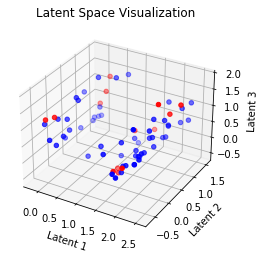

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Loop through the DataFrame and calculate latent vectors
latent_vectors_list = []
colors = []  # To store the colors for the scatter plot

for i in range(len(predictive_cat_df)):
    sample = predictive_cat_df.iloc[i]
    latent_vector = np.dot(sample, V.T)
    latent_vectors_list.append(latent_vector)
    
    if i in filtered_df.index and filtered_df.loc[i, 'ICU'] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the list of latent vectors into a NumPy array
latent_vectors = np.array(latent_vectors_list)

# Plot the latent vectors in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

if len(latent_vectors[0]) != 3 : 
    print("This 3D reprensentation is incorrect, vector size != 3")
# Plot all latent vectors
ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2], color=colors)

# Set labels and title for the plot
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.set_zlabel('Latent 3')
ax.set_title('Latent Space Visualization')

# Show the plot
plt.show()


In [162]:
import pandas as pd

# Create a new DataFrame with latent vectors
latent_df = pd.DataFrame(latent_vectors, columns=[f'latent_{i+1}' for i in range(latent_vectors.shape[1])])

# Get the remaining features from predictive_df
remaining_features_df = predictive_df.drop(predictive_cat_df.columns, axis=1)

# Merge latent_df with the remaining features
merged_df = pd.concat([latent_df, remaining_features_df], axis=1)

In [163]:
merged_df.head(5)

,latent_1,latent_2,latent_3,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,-0.102328,0.776901,-0.002133,57,160,55.0,1,117137,1.0,7,...,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,2
1,-0.193801,0.342485,-0.034832,62,159,70.0,1,37694,1.0,7,...,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,4
2,1.994253,-0.165400,0.305186,72,175,83.0,1,7,0.2,2,...,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1
3,2.052544,-0.083588,0.406235,53,177,96.0,2,572000,12.0,7,...,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,4
4,1.675676,-0.178126,-0.045226,58,160,64.3,1,602100,13.5,7,...,1.428358,135,3.9,8.849885,1.10,455,7.460937,26.638637,2.363897,1


In [164]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features in merged_df
normalized_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

In [165]:
normalized_df.head(5)

,latent_1,latent_2,latent_3,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,0.033326,0.657854,0.228539,0.587302,0.250,0.190141,0.0,0.104116,0.045411,0.461538,...,0.023170,0.56,0.296296,0.404762,0.234234,0.505777,0.783983,0.932958,0.352311,0.166667
1,0.000000,0.461345,0.215166,0.666667,0.225,0.366197,0.0,0.033500,0.045411,0.461538,...,0.041952,0.72,0.481481,0.642857,0.270270,0.468549,0.714281,0.952691,0.437209,0.500000
2,0.797172,0.231601,0.354229,0.825397,0.625,0.518779,0.0,0.000000,0.009046,0.076923,...,0.016049,0.68,0.518519,0.340476,0.189189,0.340180,0.458333,1.000000,0.480000,0.000000
3,0.818409,0.268609,0.395557,0.523810,0.675,0.671362,0.2,0.508441,0.545434,0.461538,...,0.056790,0.00,0.333333,0.433549,0.189189,0.388960,0.664185,0.657562,0.505621,0.500000
4,0.681105,0.225845,0.210915,0.603175,0.250,0.299296,0.0,0.535197,0.613619,0.461538,...,0.081997,0.52,0.481481,0.511877,0.189189,0.450578,0.670569,0.758887,0.432779,0.000000


***Try with embedding of nominal datas and PCA***

In [166]:
# Create a new DataFrame with latent vectors
latent_df = pd.DataFrame(latent_vectors, columns=[f'latent_{i+1}' for i in range(latent_vectors.shape[1])])

# Get the remaining features from predictive_df
remaining_features_df = predictive_df.drop(predictive_cat_df.columns, axis=1)

In [167]:
remaining_features_df.head(5)

,Età,Altezza,Peso,Numerocriteri,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,...,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,DurataArtesunato
0,57,160,55.0,1,117137,1.0,7,110,60,65,...,0.475355,136,3.4,8.400000,1.15,498,7.488156,29.354149,1.961553,2
1,62,159,70.0,1,37694,1.0,7,140,90,124,...,0.779619,140,3.9,9.400000,1.19,469,7.471427,29.661985,2.386043,4
2,72,175,83.0,1,7,0.2,2,80,60,87,...,0.360000,139,4.0,8.130000,1.10,369,7.410000,30.400000,2.600000,1
3,53,177,96.0,2,572000,12.0,7,125,85,105,...,1.020000,122,3.5,8.520905,1.10,407,7.459404,25.057969,2.728105,4
4,58,160,64.3,1,602100,13.5,7,107,40,125,...,1.428358,135,3.9,8.849885,1.10,455,7.460937,26.638637,2.363897,1


In [168]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate the features from the dataframe
X = remaining_features_df.values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA object with the desired number of components
n_components = 3  # Specify the number of components you want to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
pca.fit(X_scaled)

# Transform the data to the principal components
X_pca = pca.transform(X_scaled)

# Create a new dataframe with the principal components
columns = ['PC{}'.format(i) for i in range(1, n_components + 1)]
pca_remaining_df = pd.DataFrame(data=X_pca, columns=columns)



In [169]:
# Assuming pca_df is the dataframe obtained after applying PCA

# Get the absolute values of the loadings
loadings = abs(pca.components_)

# Create a dataframe with the feature names and their corresponding loadings
feature_importance_df = pd.DataFrame(loadings.T, columns=pca_remaining_df.columns, index=remaining_features_df.columns)

# Sort the features based on their importance (highest to lowest)
feature_importance_df = feature_importance_df.sum(axis=1).sort_values(ascending=False)

# Display the feature importance
print(feature_importance_df)


Percentualeparassitemia       0.642107
PAdiastolica                  0.640259
T0Hbingdl                     0.636166
Parassitemiavaloreassoluto    0.606665
T0Bilirubinadirettainmgdl     0.603161
T0Bilirubinatotinmgdl         0.577993
T0PLTincellul                 0.568615
T0SodioinmEql                 0.545133
T0ALTinUL                     0.539189
T0Lattatiinmmoll              0.533120
T0LDHinUL                     0.524618
PAsistolica                   0.520573
T0GBincellul                  0.520389
T0bicarbonatiinmmoll          0.469620
DurataArtesunato              0.468976
FR                            0.465949
T0pH                          0.459432
T0ASTinUL                     0.433800
T0Azotemiainmgdl              0.419520
T0INR                         0.390926
Ritardoterapeutico            0.390036
T0Glicemiainmgdl              0.383377
FC                            0.381668
T0GRincellul                  0.375314
T0Creatininainmgdl            0.354547
Numerocriteri            

In [170]:
pca_remaining_df.head(5)

,PC1,PC2,PC3
0,-1.334288,-0.423484,1.904512
1,-3.063187,0.584249,-0.117417
2,-0.369170,-3.088629,2.107658
3,0.551480,-0.090651,-4.398855
4,1.160758,-1.763847,-1.793595


In [171]:
# Merge latent_df with the remaining features
merged_df = pd.concat([latent_df, pca_remaining_df], axis=1)

In [172]:
merged_df.head(5)

,latent_1,latent_2,latent_3,PC1,PC2,PC3
0,-0.102328,0.776901,-0.002133,-1.334288,-0.423484,1.904512
1,-0.193801,0.342485,-0.034832,-3.063187,0.584249,-0.117417
2,1.994253,-0.165400,0.305186,-0.369170,-3.088629,2.107658
3,2.052544,-0.083588,0.406235,0.551480,-0.090651,-4.398855
4,1.675676,-0.178126,-0.045226,1.160758,-1.763847,-1.793595


In [173]:
merged_scaled = scaler.fit_transform(merged_df)

In [174]:
merged_scaled_df = pd.DataFrame(merged_scaled)

In [175]:
merged_scaled_df.head(5)

,0,1,2,3,4,5
0,-1.496010,0.436533,-0.912984,-0.607990,-0.231300,1.119556
1,-1.602912,-0.238107,-0.970177,-1.395791,0.319107,-0.069023
2,0.954196,-1.026845,-0.375444,-0.168218,-1.686960,1.238975
3,1.022319,-0.899792,-0.198697,0.251291,-0.049512,-2.585841
4,0.581885,-1.046609,-0.988358,0.528918,-0.963385,-1.054354


In [176]:
target_column

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    0
69    0
70    0
71    0
Name: ICU, Length: 72, dtype: int64

In [177]:
print("score at random is : ")
1 - target_column.sum()/len(target_column)

score at random is : 


0.8055555555555556

**Baseline is 80% predicitons**

In [178]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming merged_scaled_df is your DataFrame and target_column is your target column
X = merged_scaled_df
y = target_column

# Create a logistic regression classifier
logreg = LogisticRegression()

# Perform 10-fold cross-validation
scores = cross_val_score(logreg, X, y, cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
print(scores)

# Print the mean accuracy score and standard deviation
print("Mean accuracy: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))


Accuracy scores for each fold:
[0.875      0.875      0.85714286 0.85714286 0.71428571 0.71428571
 1.         0.71428571 0.57142857 0.71428571]
Mean accuracy: 0.79
Standard deviation: 0.12


**We'll look at the correlation of this feature with the ICU feature**

In [179]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming merged_scaled_df is your DataFrame and target_column is your target column
X = merged_scaled_df
y = target_column

# Create a logistic regression classifier
logreg = LogisticRegression()

# Train the classifier on all the data
logreg.fit(X, y)

# Get the probabilities for each sample
probabilities = logreg.predict_proba(X)[:, 1]

# Print the probabilities
print("Probabilities:")
print(probabilities)


Probabilities:
[0.08448739 0.02377713 0.13530224 0.13788258 0.21067618 0.930467
 0.14270958 0.17039358 0.08490977 0.03514845 0.07108597 0.07032265
 0.04844362 0.07204061 0.07846537 0.04708365 0.04031135 0.0369914
 0.1811481  0.11287631 0.14638716 0.12929927 0.69082526 0.11362406
 0.07324872 0.11522332 0.08772458 0.07100335 0.06103264 0.22104944
 0.0868629  0.19550113 0.1585291  0.21900827 0.22660557 0.35793079
 0.07862955 0.40679765 0.15267326 0.02811173 0.28497635 0.07512805
 0.07080777 0.39800792 0.89840427 0.3086032  0.17677503 0.30217106
 0.05891075 0.17213894 0.04455813 0.65037852 0.67437037 0.36121222
 0.30011849 0.35512844 0.02441882 0.07585259 0.53413283 0.20680914
 0.38376769 0.05945975 0.06526948 0.05221596 0.17447599 0.10375606
 0.36190311 0.05501514 0.07940115 0.03916236 0.21483712 0.1032455 ]


In [180]:
# Compute the correlation between probabilities and filtered_df['ICU']
correlation = filtered_df['ICU'].corr(pd.Series(probabilities))

# Print the correlation
print("Correlation between probabilities and filtered_df['ICU']: {:.2f}".format(correlation))

Correlation between probabilities and filtered_df['ICU']: 0.54


Feature: T0Creatininainmgdl, Correlation with ICU: 0.6458940618545059

**This first approach is unsufficient, the correlation between our new feature and ICU is lower than the correltion of creatininin**

In [181]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_dim, embedded_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, embedded_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def loss(self, distance_matrix, targets, lambda_reg = 10.0):

        pospos_sum_dist = 0
        pospos_sum_count = 0

        posneg_sum_dist = 0
        posneg_sum_count = 0
        
        negneg_sum_dist = 0
        negneg_sum_count = 0

        # print(distance_matrix)

        max_dist = torch.max(distance_matrix)

        for i in range(len(distance_matrix)) : 
            for j in range(i+1, len(distance_matrix)) : 
                if targets[i] == 1 or targets[j] == 1 : 
                    if targets[i] == 1 and targets[j] == 1 : #pos pos
                        pospos_sum_dist += distance_matrix[i][j]
                        pospos_sum_count += 1 
                    else : # pos/neg ou neg/pos
                        posneg_sum_dist += distance_matrix[i][j]
                        posneg_sum_count += 1 
                else :
                    negneg_sum_dist += distance_matrix[i][j]  
                    negneg_sum_count += 1  
        
        avg_pospos = pospos_sum_dist/pospos_sum_count
        avg_negneg = negneg_sum_dist/negneg_sum_count
        avg_posneg = posneg_sum_dist/posneg_sum_count

        # avg pos pos + avg neg neg - avg pos neg + max dist (so it stays positive)
        distance_loss = (avg_pospos + avg_negneg) / (2*avg_posneg)
        
        regularization_loss = 0
        for param in self.parameters():
            regularization_loss += torch.sum(torch.square(param))

        # print('distance_loss ='+str(distance_loss))
        # print('lambda_reg * regularization_loss ='+str(lambda_reg * regularization_loss))
        return distance_loss + lambda_reg * regularization_loss

# Set the input and embedded dimensions
input_dim = merged_scaled_df.shape[1]
embedded_dim = 1

# Create an instance of the network
model = Net(input_dim, embedded_dim)


In [182]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom dataset class
class MyDataset(Dataset):
    def __init__(self, dataframe, target_column):
        self.data = torch.tensor(dataframe.values, dtype=torch.float32)
        self.targets = torch.tensor(target_column.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    

# Create an instance of your custom dataset
dataset = MyDataset(merged_scaled_df, target_column)

# Define the batch size
batch_size = len(merged_scaled_df)

# Create the data loader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [183]:
# Convert the merged_scaled dataframe to a PyTorch tensor
data = torch.tensor(merged_scaled_df.values, dtype=torch.float32)

targets = torch.tensor(target_column.values, dtype=torch.float32)

In [184]:
import torch.optim.lr_scheduler as lr_scheduler
import torch
import torch.nn as nn
import torch.optim as optim

In [185]:
already_trained = True
will_save_weight = False

In [186]:
if not already_trained :
    # Define the optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Define the learning rate scheduler
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

    # Training loop
    epochs = 125
    for epoch in range(epochs):

        # Compute les embeddings

        # Create an empty tensor to store the embeddings
        embeddings = torch.empty((data.shape[0], embedded_dim))

        total_loss = 0

        for i in range(data.shape[0]):
            sample = data[i]
            embedded_sample = model(sample)
            embeddings[i] = embedded_sample

        distance_matrix = torch.cdist(embeddings, embeddings, p=2)

        optimizer.zero_grad()
        
        # Compute la matrice de distance 

        loss = model.loss(distance_matrix, targets) 
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

        # Update the learning rate based on the validation loss
        val_loss = total_loss / data.shape[0]
        scheduler.step(val_loss)
        print('epoch : '+str(epoch)+' loss : '+str(val_loss))

else : 
    # Load the saved weights
    model.load_state_dict(torch.load('../data/model_weights.pth'))

In [187]:
if will_save_weight : 
    # After training your model, save the weights
    torch.save(model.state_dict(), '../data/model_weights.pth')

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Step 1: Encode the data using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Create an empty tensor to store the embeddings
    embeddings = torch.empty((data.shape[0], embedded_dim))

    total_loss = 0

    for i in range(data.shape[0]):
        sample = data[i]
        embedded_sample = model(sample)
        embeddings[i] = embedded_sample

colors = []
for i in range(len(merged_scaled_df)):
    if target_column[i] == 1:
        colors.append('red')  # Corresponding sample in filtered_df has 'ICU' value set to 1
    else:
        colors.append('blue')  # Corresponding sample in filtered_df does not have 'ICU' value set to 1

# Convert the embeddings tensor to a NumPy array
latent_vectors = embeddings.numpy()


In [189]:
latent_vectors = latent_vectors.ravel()

In [190]:
import numpy as np

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features in merged_df
latent_vectors -= latent_vectors.mean()
latent_vectors /= latent_vectors.var()


In [191]:
print(latent_vectors)

[ -30023.295  -146302.97    -69741.95    220407.83     92073.59
  296839.56    -36228.324   -58721.56      1648.211  -121838.34
  -29958.66   -141907.73    -75462.21   -145495.02    -49801.83
  -71713.336     2003.7075 -152508.      -44566.336   220246.23
  -13056.417    62244.207   205638.56   -101251.87     24076.809
 -142101.64     17354.693   -70388.305   -12216.152  -101510.41
 -143426.67      3393.3757  137771.05    135605.75    108555.7
   34644.75   -142037.02     23204.227   -46311.5    -141196.75
    2294.5684 -149340.84   -126815.3     266072.97    300200.62
  -60434.406   -45697.46     97406.04   -124391.46    -92849.22
  -54778.777   149308.53    285043.56     71681.02    211617.38
 -100540.875  -148468.27   -130240.99    279808.06    243256.56
  202729.95    -47248.715  -141261.38     10180.127    62793.61
 -110397.82     94012.664   -46052.957  -100573.195  -135573.44
  -15900.389  -142521.78  ]


In [192]:
# Compute the correlation between probabilities and filtered_df['ICU']
correlation = filtered_df['ICU'].corr(pd.Series(latent_vectors))

# Print the correlation
print("Correlation between probabilities and filtered_df['ICU']: {:.2f}".format(correlation))

Correlation between probabilities and filtered_df['ICU']: 0.76
